<a href="https://colab.research.google.com/github/EunikeChristabelle/Python---Scientific-Computing/blob/main/16_03_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#interpolasi : tahu data akurat, memperkirakan nilai nilai di titik data
#Tujuan mencari kurva dan memperkirakan nilai2
#Regresi : cari fungsi terdekat / pola umum, di AI utk memprediksi data (data bnyk , series)

In [ ]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

plt.style.use ('seaborn-poster')
x = [0, 1, 2]
y = [1, 3, 2]

f = interp1d(x,y)
y_hat = f(1.5)
print(y_hat)


2.5


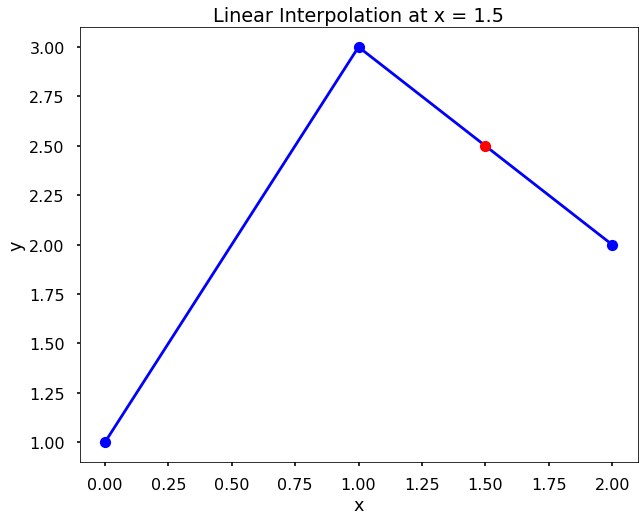

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(x,y, '-ob')
plt.plot(1.5, y_hat, 'ro')
plt.title('Linear Interpolation at x = 1.5')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

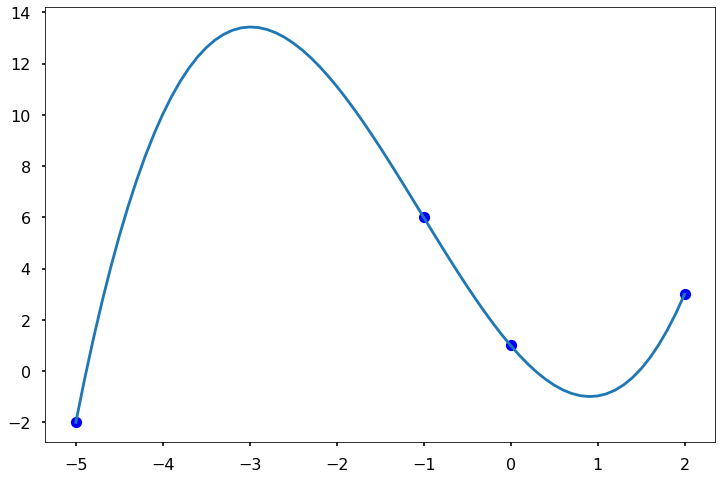

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline
def divided_diff(x,y):
  n = len(y)
  coef = np.zeros([n,n])
  # the first column is y
  coef[:,0] = y

  for j in range(1,n):
      for i in range(n-j):
          coef[i][j] = \
          (coef[i+1][j-1]- coef[i][j-1])/ (x[i+j]-x[i])

  return coef

def newton_poly(coef, x_data, x):
    n = len(x_data) - 1
    p = coef[n]
    for k in range(1, n+1):
      p = coef[n-k] + (x-x_data[n-k])*p
    return p

x = np.array([-5, -1, 0, 2])
y = np.array([-2, 6, 1, 3])
#get the divided difference coef
a_s = divided_diff(x,y)[0, :]

#evaluate on new data points
x_new = np.arange(-5, 2.1, .1)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (12,8))
plt.plot(x,y,'bo')
plt.plot(x_new, y_new)



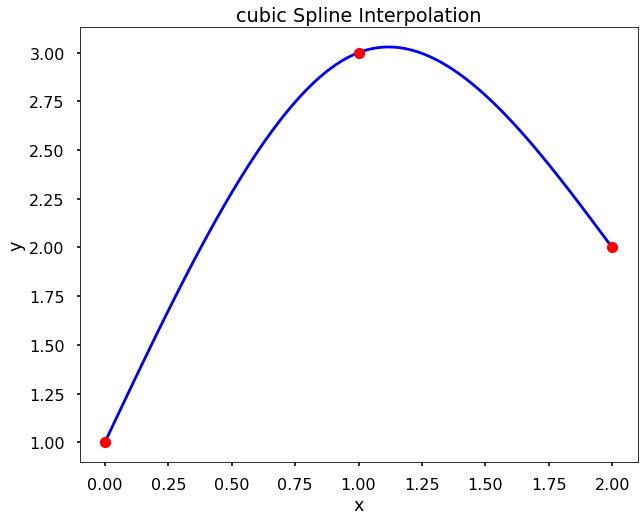

In [ ]:
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')
x = [0, 1, 2]
y = [1, 3, 2]

f = CubicSpline(x, y , bc_type='natural')
x_new = np.linspace(0, 2, 100)
y_new = f(x_new)

plt.figure(figsize = (10,8))
plt.plot(x_new, y_new, 'b')
plt.plot(x,y, 'ro')
plt.title('cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()